In [294]:
import pandas as pd


df = pd.read_csv("owid-covid-data.csv")

df_shape = df.shape

In [295]:
print(f"il data frame è composto da {df_shape[0]} righe e {df_shape[1]} colonne")

il data frame è composto da 387330 righe e 67 colonne


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387330 entries, 0 to 387329
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387330 non-null  object 
 1   continent                                   368774 non-null  object 
 2   location                                    387330 non-null  object 
 3   date                                        387330 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [297]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.483330e+05,3.762800e+05,3.750500e+05,3.261090e+05,376589.000000,375359.000000,348333.000000,376280.000000,375050.000000,326109.000000,...,222683.000000,147332.000000,265635.000000,356730.000000,291692.000000,3.873300e+05,1.318700e+04,13187.000000,13187.000000,13187.000000
mean,7.386532e+06,8.728781e+03,8.756916e+03,8.996469e+04,78.157939,78.405166,112347.967657,132.572340,133.002194,918.307054,...,32.910922,50.793168,3.097544,73.712526,0.722586,1.292804e+08,5.579910e+04,9.770265,10.979027,1777.206419
std,4.398509e+07,2.397048e+05,9.038526e+04,4.566992e+05,1424.517554,534.387547,160036.519608,1544.311765,571.529927,1131.569486,...,13.572648,31.952844,2.548154,7.394828,0.149001,6.634103e+08,1.559496e+05,12.022926,24.585788,1992.786873
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,9.448000e+03,0.000000e+00,0.000000e+00,1.360000e+02,0.000000,0.000000,2954.509000,0.000000,0.000000,65.307000,...,22.600000,20.859000,1.300000,69.590000,0.602000,4.490020e+05,1.781000e+02,2.080000,-1.490000,120.205410
50%,7.971300e+04,0.000000e+00,1.700000e+01,1.393000e+03,0.000000,0.143000,32240.542000,0.000000,4.197000,414.035000,...,33.100000,49.839000,2.500000,75.050000,0.740000,5.882259e+06,6.694300e+03,8.150000,5.660000,1248.656900
75%,8.516680e+05,0.000000e+00,4.024290e+02,1.257300e+04,0.000000,4.000000,155233.877000,0.000000,68.598000,1453.121000,...,41.300000,82.686750,4.200000,79.460000,0.829000,2.830170e+07,3.877775e+04,15.050000,15.690000,2878.521250
max,7.749544e+08,4.423623e+07,6.319461e+06,7.040264e+06,103719.000000,14817.000000,765370.756000,240325.866000,34332.267000,6485.570000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.345330e+06,78.080000,377.830000,10293.515000


Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente. 
Riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente):  
  - valore massimo
  - media
  - percentuale  


In [298]:

clean_covid_df = df.dropna(subset=["continent", "location", "total_cases"])
max_cases_per_location = df_clean.groupby(['continent', 'location'])['total_cases'].max()
max_cases_per_location.groupby("continent").sum()


continent
Africa            13139991.0
Asia             301414628.0
Europe           252376812.0
North America    124530611.0
Oceania           14808141.0
South America     68716854.0
Name: total_cases, dtype: float64

,Max_cases
Continent,
Europe,252376812.0
North America,124530611.0


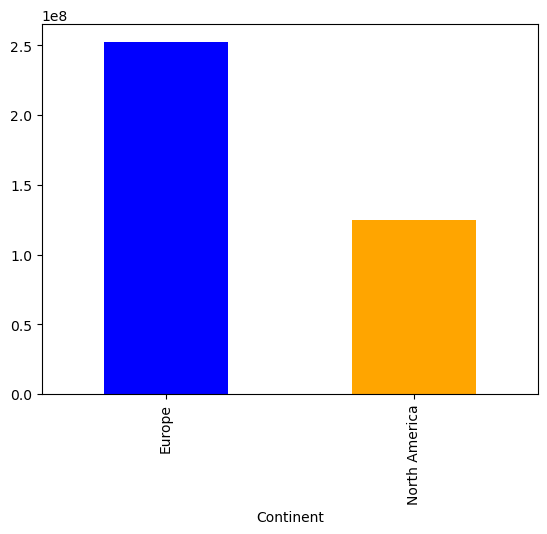

In [299]:
import matplotlib.pyplot as plt

usa_europe_stats = pd.DataFrame()

europe, n_america = "Europe", "North America"
total_cases = clean_covid_df.groupby("location")["total_cases"].max().sum()

for continent in (europe, n_america):

    max_cases = [clean_covid_df[clean_covid_df['continent'] == continent].groupby("location")["total_cases"].max().sum()]
    mean = [clean_covid_df[clean_covid_df['continent'] == continent].groupby("location")["total_cases"].max().mean()]
    temp = pd.DataFrame({
                            "Continent" : continent,
                            "Max_cases" : max_cases,
                            "Mean": mean,
                            "Perc_on_total_cases" : (max_cases / total_cases) * 100
                        }).round(2).set_index("Continent")
    usa_europe_stats = pd.concat([usa_europe_stats, temp])

usa_europe_stats.Max_cases.plot(kind ="bar", color = ["Blue", "Orange"])
usa_europe_stats["Max_cases"].to_frame()


,Mean
Continent,
Europe,4948564.94
North America,3037331.98


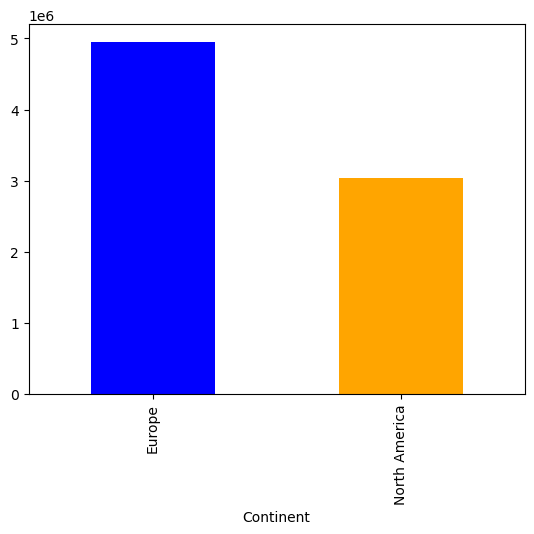

In [300]:
usa_europe_stats.Mean.plot(kind ="bar", color = ["Blue", "Orange"])
usa_europe_stats["Mean"].to_frame()

,Perc_on_total_cases
Continent,
Europe,32.57
North America,16.07


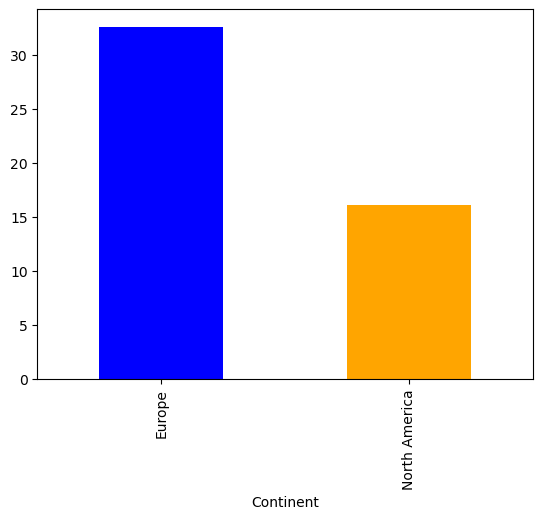

In [301]:
usa_europe_stats.Perc_on_total_cases.plot(kind ="bar", color = ["Blue", "Orange"])
usa_europe_stats["Perc_on_total_cases"].to_frame()

Selezionare i dati relativi all'Italia nel 2022 e:
- Mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data.   
- Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario).
- Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali

In [302]:
italy_df = clean_covid_df[clean_covid_df["location"]== "Italy"]
italy_df["date"] = pd.to_datetime(italy_df["date"])
italy_22 = italy_df[italy_df["date"].dt.year == 2022]
italy_22["month"] = italy_22["date"].dt.month

/tmp/ipykernel_25436/1944358915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_df["date"] = pd.to_datetime(italy_df["date"])
/tmp/ipykernel_25436/1944358915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_22["month"] = italy_22["date"].dt.month


<AxesSubplot:xlabel='month'>

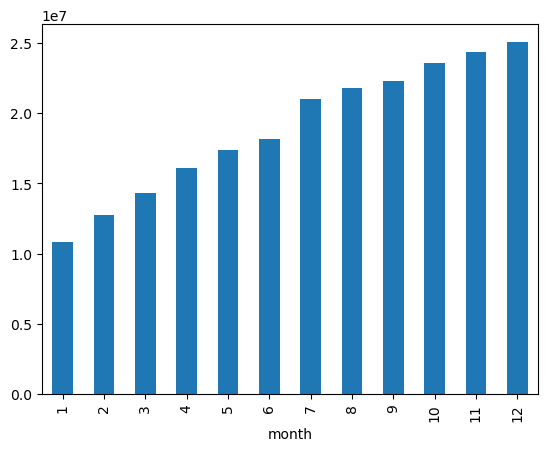

In [303]:
italy_22.groupby("month")["total_cases"].max().plot(kind="bar")

<AxesSubplot:xlabel='month'>

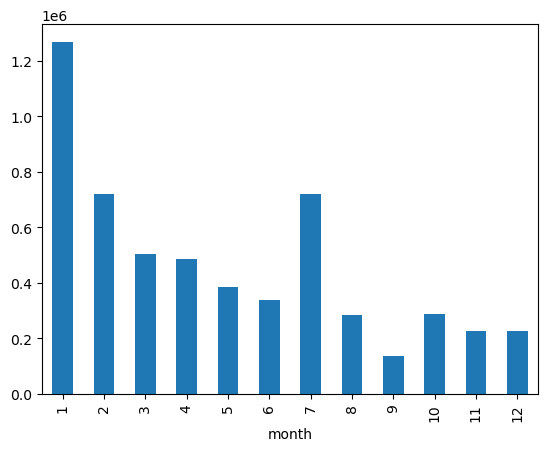

In [304]:
italy_22.groupby("month")["new_cases"].max().plot(kind="bar")

<AxesSubplot:xlabel='month'>

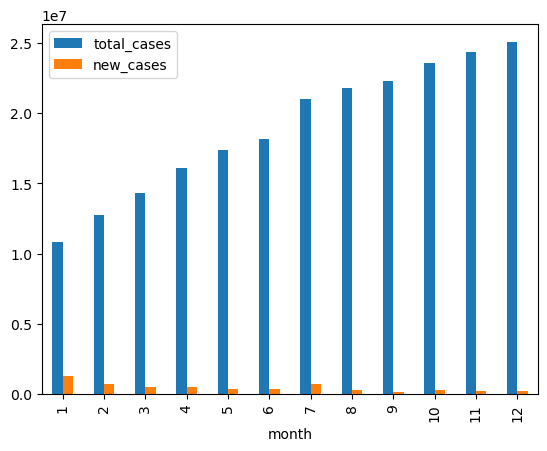

In [305]:
italy_22.groupby("month")[["total_cases", "new_cases"]].max().plot(kind="bar")

In [306]:
# Il grafico rappresenta la tendenza della pandemia a ragiungere i livelli di contagio massimi nei periodi di Gennaio e Luglio. 
# Allo stesso tempo, mostra una non elevata incidenza dei casi italiani nel 2022 sui contagi mondiali.

Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva 
(Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

/tmp/ipykernel_25436/3114629771.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_ger_it_df["date"] = pd.to_datetime(fr_ger_it_df["date"])


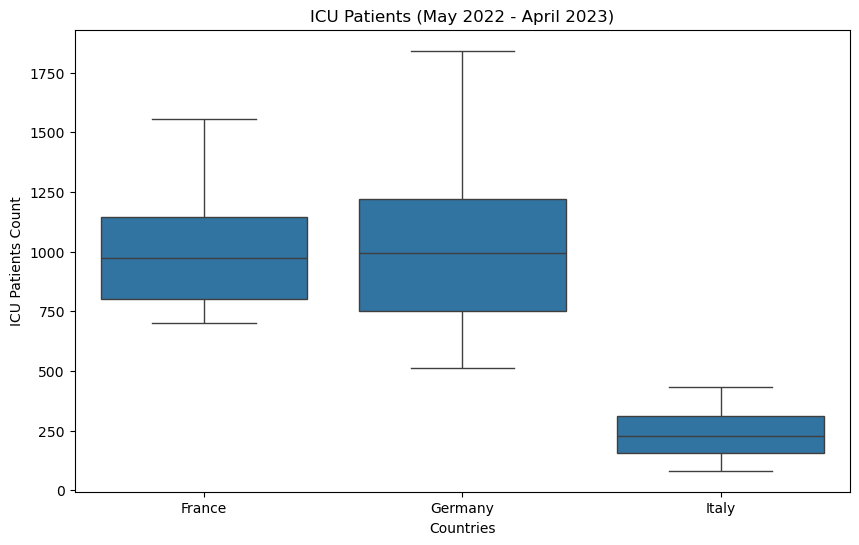

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt


fr_ger_it_df = clean_covid_df[clean_covid_df['location'].isin(['Italy', 'Germany', 'France'])]
fr_ger_it_df["date"] = pd.to_datetime(fr_ger_it_df["date"])
time_range_df= fr_ger_it_df[(fr_ger_it_df['date'] >= '2022-05-01') & (fr_ger_it_df['date'] <= '2023-04-30')]

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data= time_range_df)
plt.title('ICU Patients (May 2022 - April 2023)')
plt.xlabel('Countries')
plt.ylabel('ICU Patients Count')
plt.show()

Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna, se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [308]:
spain_df = clean_covid_df[clean_covid_df['location'] == "Spain"]
spain_df["date"] = pd.to_datetime(spain_df["date"])
last_comparison_df = pd.concat([fr_ger_it_df, spain_df])
last_comparison_df.groupby("location")["hosp_patients"].sum()


/tmp/ipykernel_25436/268510911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df["date"] = pd.to_datetime(spain_df["date"])


location
France     19367212.0
Germany           0.0
Italy      13356874.0
Spain       6472838.0
Name: hosp_patients, dtype: float64

In [309]:
null = last_comparison_df["hosp_patients"].isnull().groupby(last_comparison_df["location"]).sum()
null

location
France      404
Germany    1534
Italy        22
Spain       475
Name: hosp_patients, dtype: int64